# **Insurance Claims- Fraud Detection**
**Problem Statement:**
Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Importing the dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Automobile_insurance_fraud.csv',parse_dates=['policy_bind_date'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Importing the required libraries

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time

Basic outlook over the dataset

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df['_c39'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: _c39, dtype: float64

In [7]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [9]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
df.shape

(1000, 39)

In [11]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Observations:

1.Most of the columns are of object type.

Exploratary Data Analysis

Univariate Analysis

1.months_as_customer

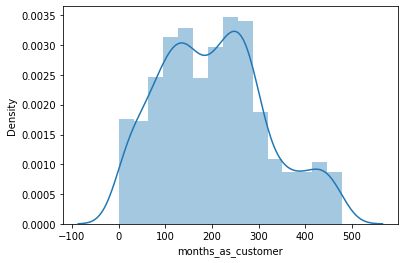

In [13]:
sns.distplot(df['months_as_customer'])

Observations:

1.The months as customer ranges from o to 480

2.age

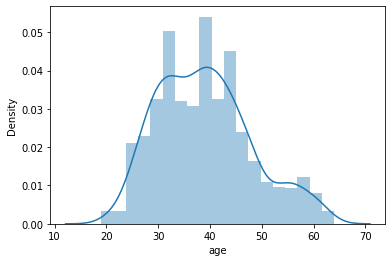

In [14]:
sns.distplot(df['age'])

Observations:

1.We can see that the ranges from 19 to 64 and most of the customers lie between 25 to 50.

3.policy_number

Observations:

1.This column is of no use since its just numbers for identification.

In [15]:
df1=df.drop('policy_number',axis=1)

4.policy_bind_date

In [16]:
df1['policy_bind_date'].head(4)

0   2014-10-17
1   2006-06-27
2   2000-06-09
3   1990-05-25
Name: policy_bind_date, dtype: datetime64[ns]

In [17]:
df1['policy_bind_year'] = pd.DatetimeIndex(df1['policy_bind_date']).year
df1['policy_bind_year'].head()

0    2014
1    2006
2    2000
3    1990
4    2014
Name: policy_bind_year, dtype: int64

In [18]:
df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


In [19]:
df1.drop('policy_bind_date',axis=1,inplace=True)

In [20]:
df1.shape

(1000, 38)

5.Policy state

In [21]:
df1['policy_state'].head()

0    OH
1    IN
2    OH
3    IL
4    IL
Name: policy_state, dtype: object

In [22]:
df1['policy_state'].isnull().sum()

0

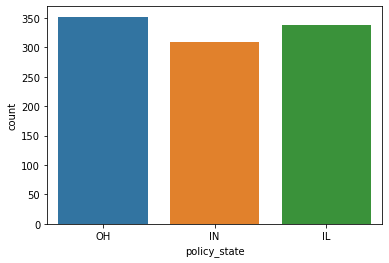

In [23]:
sns.countplot(df1['policy_state'])

Observations:

1.We can see that all three are almost in numbers but as a fact OH is on top followed by IL and IN

In [24]:
#creating the dictionary to know which label represents what
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df1['policy_state'])
label_policy_state=dict(zip(range(len(le.classes_)),le.classes_)) 

In [25]:
df1['policy_state']=le.fit_transform(df1['policy_state'])

6.policy_csl

In [26]:
df1['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

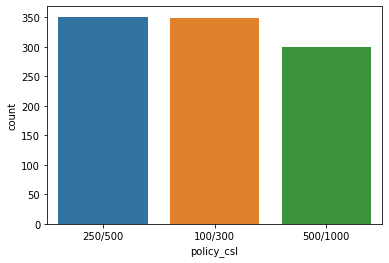

In [27]:
sns.countplot(df1['policy_csl'])

Observations:

1.Both 250/500 and 100/300 policy csl are same in numbers and 50/1000 are quite less comparitively.

In [28]:
le.fit(df1['policy_csl'])
label_policy_csl=dict(zip(range(len(le.classes_)),le.classes_))

In [29]:
df1['policy_csl']=le.fit_transform(df1['policy_csl'])

In [30]:
df1['policy_csl'].value_counts()

1    351
0    349
2    300
Name: policy_csl, dtype: int64

7.policy_deductable

In [31]:
df1['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

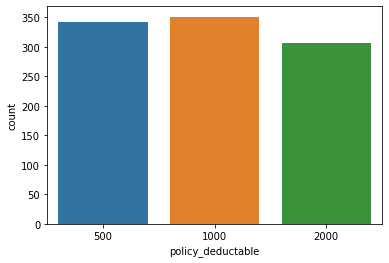

In [32]:
sns.countplot(df1['policy_deductable'])

Observations:

1.We can see that almost 500 and 1000 are same in numbers followed by 2000.

In [33]:
le.fit(df1['policy_deductable'])
label_policy_deductable=dict(zip(range(len(le.classes_)),le.classes_)) 

In [34]:
df1['policy_deductable']=le.fit_transform(df1['policy_deductable'])

8.policy_annual_premium

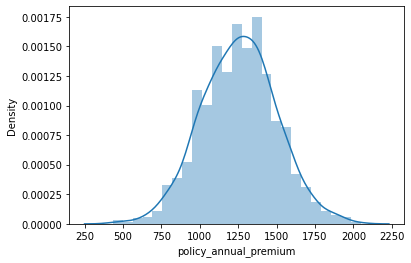

In [35]:
sns.distplot(df1['policy_annual_premium'])

Observations:

1.There is significantly less distortion.

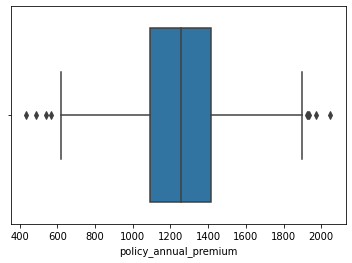

In [36]:
sns.boxplot(df1['policy_annual_premium'])

Observations:

1.There are significantly less outliers.

9.umbrella_limit

In [37]:
df1['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

[Text(0, 0, '-1000000'),
 Text(0, 0, '0'),
 Text(0, 0, '2000000'),
 Text(0, 0, '3000000'),
 Text(0, 0, '4000000'),
 Text(0, 0, '5000000'),
 Text(0, 0, '6000000'),
 Text(0, 0, '7000000'),
 Text(0, 0, '8000000'),
 Text(0, 0, '9000000'),
 Text(0, 0, '10000000')]

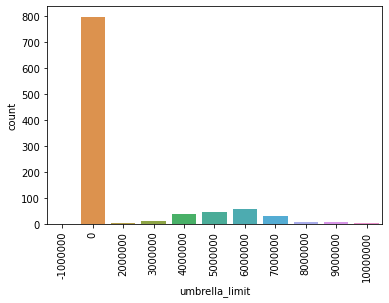

In [38]:
count1=sns.countplot(df1['umbrella_limit'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)

Observations:

1.Majority of the umbrella limit is 0,

In [39]:
le.fit(df1['umbrella_limit'])
label_umbrella_limit=dict(zip(range(len(le.classes_)),le.classes_)) 

In [40]:
df1['umbrella_limit']=le.fit_transform(df1['umbrella_limit']) 

10.insured_zip

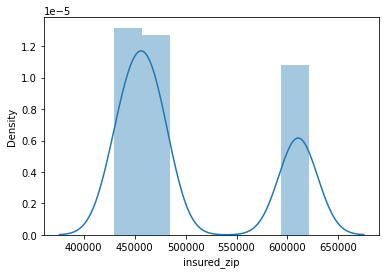

In [41]:
sns.distplot(df1['insured_zip'])

Observations:

1.The values circle around two main values 450000 and 600000

11.insured_sex

In [43]:
df1['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

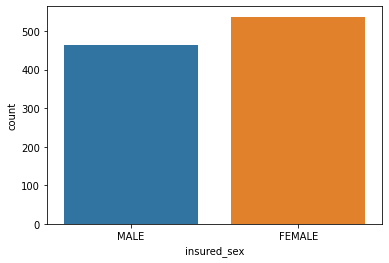

In [44]:
sns.countplot(df1['insured_sex'])

Observations:

1.Females are more than males.

In [46]:
le.fit(df1['insured_sex'])
label_insured_sex=dict(zip(range(len(le.classes_)),le.classes_)) 

In [47]:
df1['insured_sex']=le.fit_transform(df1['insured_sex'])

12.insured_education_level

In [48]:
df1['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

[Text(0, 0, 'MD'),
 Text(0, 0, 'PhD'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'High School'),
 Text(0, 0, 'College'),
 Text(0, 0, 'JD')]

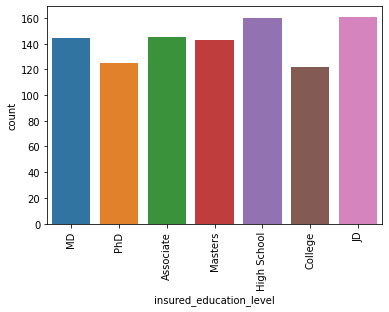

In [49]:
count79=sns.countplot(df1['insured_education_level'])
count79.set_xticklabels(count79.get_xticklabels(),rotation=90)

Observations:

1.JD and High school are tops the chart followed by MD,Associate and Masters

In [50]:
le.fit(df1['insured_education_level'])
label_insured_education_level=dict(zip(range(len(le.classes_)),le.classes_)) 

In [51]:
df1['insured_education_level']=le.fit_transform(df1['insured_education_level'])

13:insured_occupation

In [52]:
df1['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

[Text(0, 0, 'craft-repair'),
 Text(0, 0, 'machine-op-inspct'),
 Text(0, 0, 'sales'),
 Text(0, 0, 'armed-forces'),
 Text(0, 0, 'tech-support'),
 Text(0, 0, 'prof-specialty'),
 Text(0, 0, 'other-service'),
 Text(0, 0, 'priv-house-serv'),
 Text(0, 0, 'exec-managerial'),
 Text(0, 0, 'protective-serv'),
 Text(0, 0, 'transport-moving'),
 Text(0, 0, 'handlers-cleaners'),
 Text(0, 0, 'adm-clerical'),
 Text(0, 0, 'farming-fishing')]

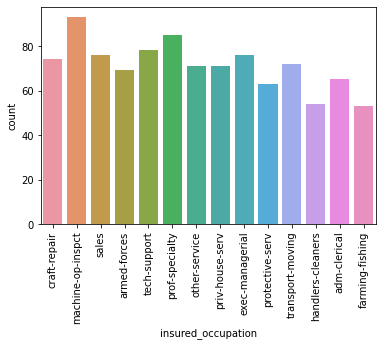

In [53]:
count84=sns.countplot(df1['insured_occupation'])
count84.set_xticklabels(count84.get_xticklabels(),rotation=90)

Observations:

1.There are 14 categories in occupation topped by machine-op-inspect and prof-speciality.

In [54]:
le.fit(df1['insured_occupation'])
label_insured_occupation=dict(zip(range(len(le.classes_)),le.classes_)) 

In [55]:
df1['insured_occupation']=le.fit_transform(df1['insured_occupation'])

14:insured_hobbies

In [56]:
df1['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

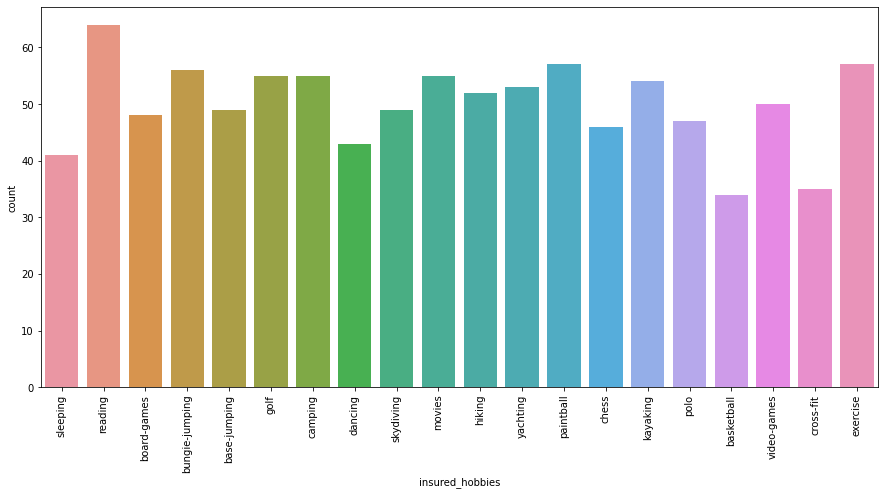

In [57]:
plt.figure(figsize=(15,7))
count90=sns.countplot(df1['insured_hobbies'])
count90.set_xticklabels(count90.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Reading and Exercise tops the charts.

In [58]:
le.fit(df1['insured_hobbies'])
label_insured_hobbies=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['insured_hobbies']=le.fit_transform(df1['insured_hobbies'])

15:insured_relationship

In [59]:
df1['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

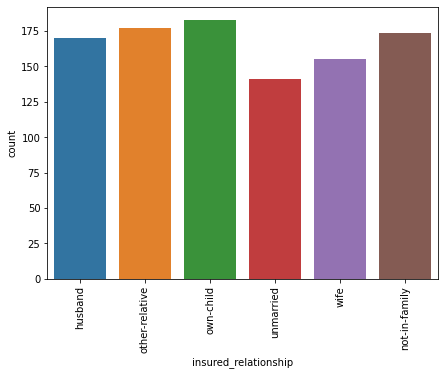

In [60]:
plt.figure(figsize=(7,5))
count95=sns.countplot(df1['insured_relationship'])
count95.set_xticklabels(count95.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Majority insured relationship is own child followed by other relative and husband.

In [61]:
le.fit(df1['insured_relationship'])
label_insured_relationship=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['insured_relationship']=le.fit_transform(df1['insured_relationship'])

16:capital-gains

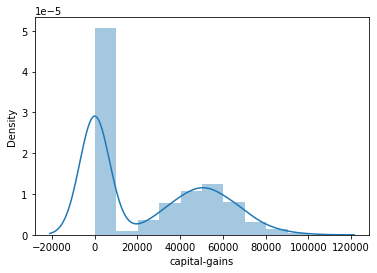

In [62]:
sns.distplot(df1['capital-gains'])

Observations:

1.The capital gains ranges from 0 to 1lakh,

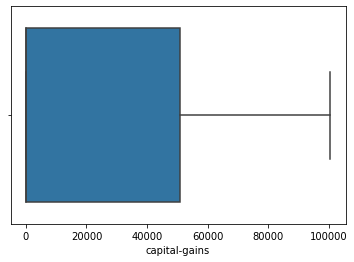

In [63]:
sns.boxplot(df1['capital-gains'])

Observations:

1.There arent any significant number of outliers.

17:capital-loss

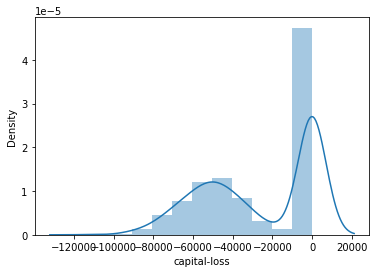

In [64]:
sns.distplot(df1['capital-loss'])

Observations:

1.The capital loss is just the opposite of the capital gain.

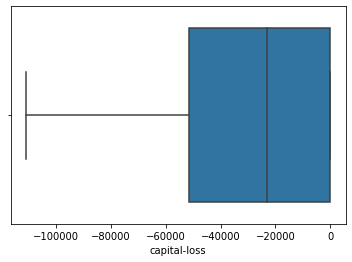

In [65]:
sns.boxplot(df1['capital-loss'])

Observations:

1.There arent any significant number of outliers.

18:incident_date

In [66]:
df1['incident_date'].head()

0    25-01-2015
1    21-01-2015
2    22-02-2015
3    10-01-2015
4    17-02-2015
Name: incident_date, dtype: object

In [67]:
df1.drop('incident_date',axis=1,inplace=True)

19:incident_type

In [68]:
df1['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

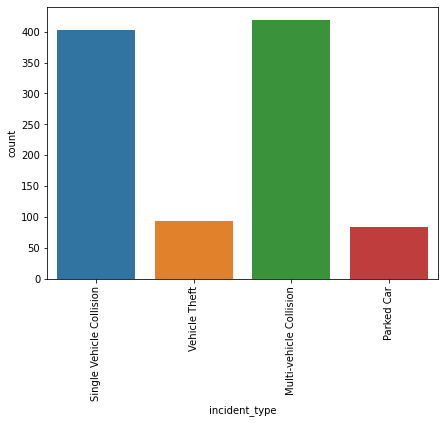

In [69]:
plt.figure(figsize=(7,5))
count110=sns.countplot(df1['incident_type'])
count110.set_xticklabels(count110.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.We can see that most of the incident types are collisions, Multivehicle collision tops the chart followed by single vehiclee collision,vehicle theft and parked car.

In [70]:
le.fit(df1['incident_type'])
label_incident_type=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_type']=le.fit_transform(df1['incident_type'])

20:collision_type

In [71]:
df1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [72]:
df1['collision_type'].replace('?','Rear Collision',inplace=True)

In [73]:
df1['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

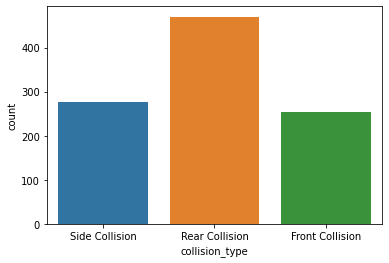

In [74]:
sns.countplot(df1['collision_type'])

Observations:

1.Most of the collisions are rear collisions.

In [75]:
le.fit(df1['collision_type'])
label_collision_typet=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['collision_type']=le.fit_transform(df1['collision_type'])

21: incident_severity

In [76]:
df1['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

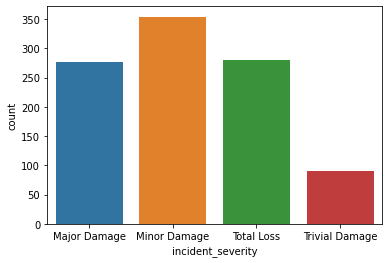

In [77]:
sns.countplot(df1['incident_severity'])

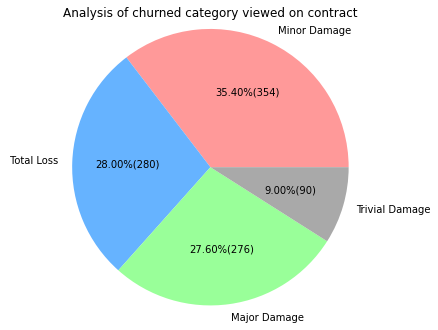

In [78]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Minor Damage',' Total Loss','Major Damage','Trivial Damage']
value=[354,280,276,90]
colors = ['#ff9999','#66b3ff','#99ff99','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

Observations:

1.We can see that 34.40% are of minor damage followed by major damage of 27.6%.

In [79]:
le.fit(df1['incident_severity'])
label_incident_severity=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_severity']=le.fit_transform(df1['incident_severity'])

22.authorities_contacted

In [80]:
df1['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

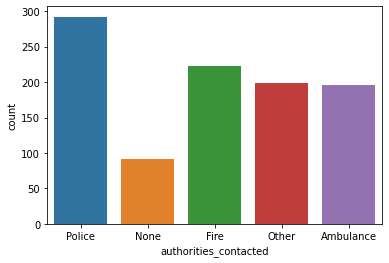

In [81]:
sns.countplot(df1['authorities_contacted'])

Observations:

1.Police tops the chart followed by fire ,other and ambulance.

In [82]:
le.fit(df1['authorities_contacted'])
label_authorities_contacted=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['authorities_contacted']=le.fit_transform(df1['authorities_contacted'])

23: incident_state

In [83]:
df1['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

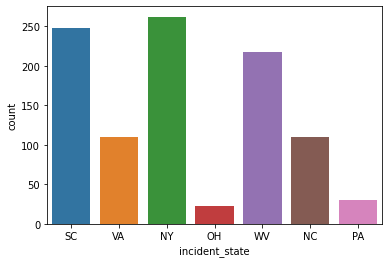

In [84]:
sns.countplot(df1['incident_state'])

Observations:

1.Incident state chart is toped by NY,SC and WV.

In [86]:
le.fit(df1['incident_state'])
label_incident_state=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_state']=le.fit_transform(df1['incident_state'])


24:incident_city

In [87]:
df1['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

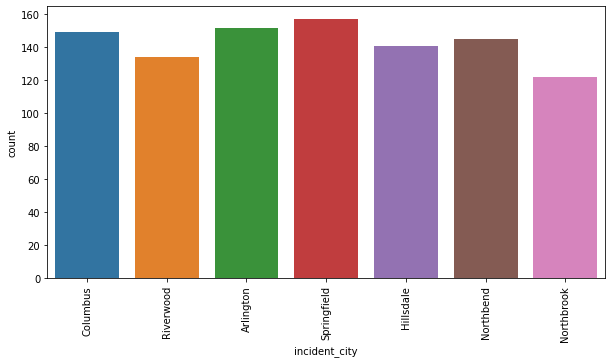

In [88]:
plt.figure(figsize=(10,5))
count129=sns.countplot(df1['incident_city'])
count129.set_xticklabels(count129.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Almost all the city have equal number of cases.

In [89]:
le.fit(df1['incident_city'])
label_incident_city=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_city']=le.fit_transform(df1['incident_city'])

25: incident_location

In [90]:
df1['incident_location'].value_counts()

9935 4th Drive             1
4214 MLK Ridge             1
8548 Cherokee Ridge        1
2352 MLK Drive             1
9734 2nd Ridge             1
3122 Apache Drive          1
9816 Britain St            1
8214 Flute St              1
6259 Lincoln Hwy           1
4492 Andromedia Ave        1
6179 3rd Ridge             1
3799 Embaracadero Drive    1
5071 1st Lane              1
6574 4th Drive             1
2711 Britain Ave           1
7976 Britain Drive         1
3555 Francis Ridge         1
4995 Weaver Ridge          1
1515 Embaracadero St       1
2968 Andromedia Ave        1
9236 2nd Hwy               1
9639 Britain Ridge         1
9422 Washington Ridge      1
1213 4th Lane              1
3872 5th Drive             1
9397 5th Hwy               1
8876 1st St                1
3397 5th Ave               1
3263 Pine Ridge            1
8639 5th Hwy               1
4835 Britain Ridge         1
9562 4th Ridge             1
6834 1st Drive             1
1953 Sky Lane              1
4702 Texas Dri

Observations:

1.Since all the incident location is different then it has got no use ,its just like random numbers, so we can remove this column.

In [91]:
df1.drop('incident_location',axis=1,inplace=True)

26:incident_hour_of_the_day

In [92]:
df1['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

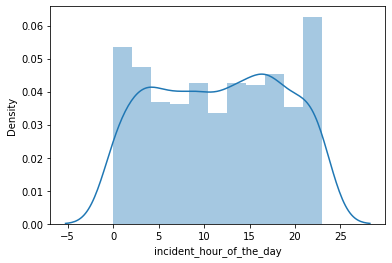

In [93]:
sns.distplot(df1['incident_hour_of_the_day'])

Observations:

1.The incidents were similar in almost all the hours.

27:number_of_vehicles_involved

In [94]:
df1['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

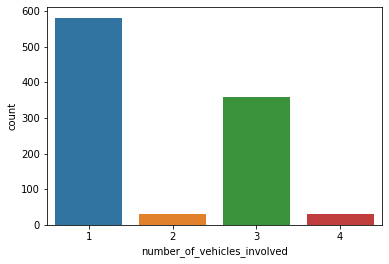

In [95]:
sns.countplot(df1['number_of_vehicles_involved'])

Observations:

1.In majority of the cases the number of vehicle involved is 1 followed by 3.

28:property_damage

In [96]:
df1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [97]:
df1['property_damage'].replace('?',np.nan,inplace=True)

In [98]:
df1['property_damage'].replace('bfill',np.nan,inplace=True)

In [99]:
df1['property_damage'].fillna(method='bfill',inplace=True)

In [100]:
df1['property_damage'].value_counts()

NO     525
YES    472
Name: property_damage, dtype: int64

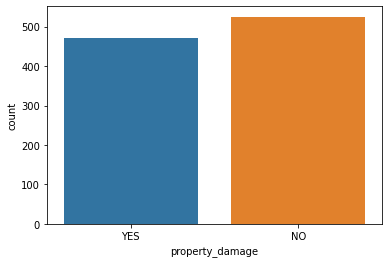

In [101]:
sns.countplot(df1['property_damage'])

Observations:

1.In majority of the cases there arent any property damage.

29:bodily_injuries

In [102]:
df1['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

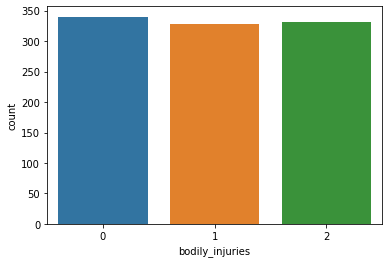

In [103]:
sns.countplot(df['bodily_injuries'])

Observations:

1.Almost all the categories are in equal propotion.

30:witnesses

In [104]:
df1['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

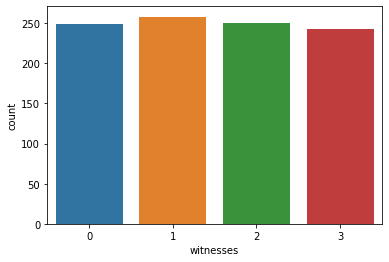

In [105]:
sns.countplot(df1['witnesses'])

Observations:

1.Almost all the categories are in equal propotions.

31:police_report_available

In [106]:
df1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [107]:
df1['police_report_available'].replace('?',np.nan,inplace=True)
time.sleep(3)
df1['police_report_available'].fillna(method='bfill',inplace=True)

In [108]:
df1['police_report_available'].value_counts()

NO     514
YES    485
Name: police_report_available, dtype: int64

In [109]:
df1['police_report_available'].fillna('YES',inplace=True)

In [110]:
df1['police_report_available'].isnull().sum()

0

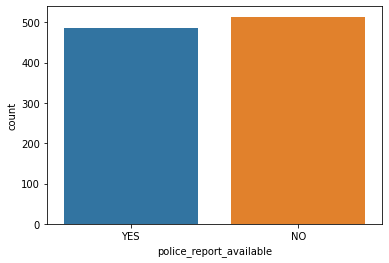

In [111]:
sns.countplot(df1['police_report_available'])

Observations:

1.Almost in 52% of the cases there arent any police reports available.

32:total_claim_amount

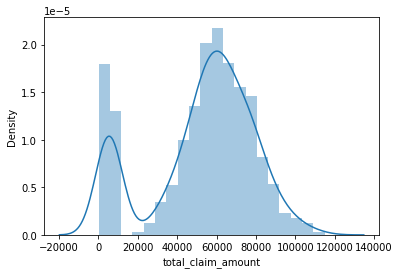

In [112]:
sns.distplot(df1['total_claim_amount'])

Observations:

1.The amount ranges from 20000 to 120000.

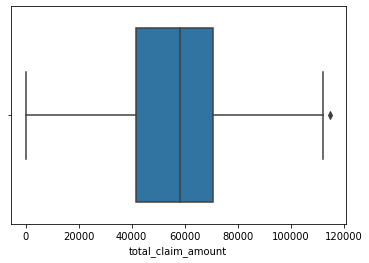

In [113]:
sns.boxplot(df1['total_claim_amount'])

Observations:

1.There arent any significant number of outliers.

33:injury_claim

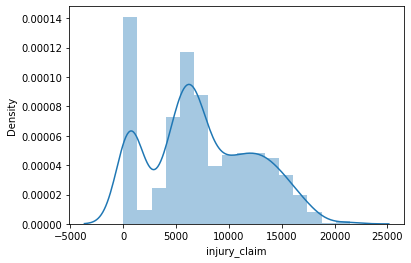

In [114]:
sns.distplot(df1['injury_claim'])

Observations:

1.The value ranges from 0 to 20000.

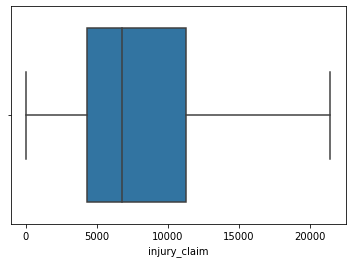

In [115]:
sns.boxplot(df1['injury_claim'])

Observations:

1.There are no outliers.

34:property_claim

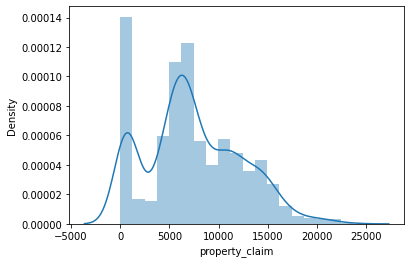

In [116]:
sns.distplot(df1['property_claim'])

Observations:

1.The property claim ranges from 0 to 20000.

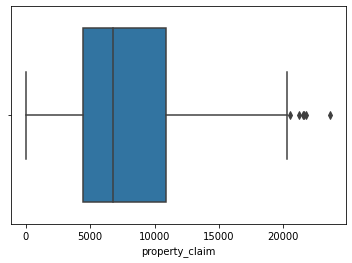

In [117]:
sns.boxplot(df1['property_claim'])

Observations:

1.There are few outliers.

35:vehicle_claim

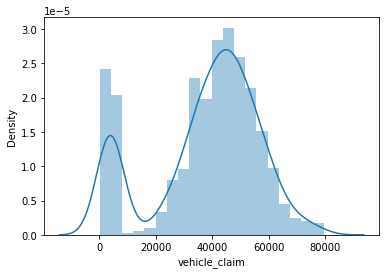

In [118]:
sns.distplot(df1['vehicle_claim'])

Observations:

1.The vehicle claim ranges from 20k to 80k.

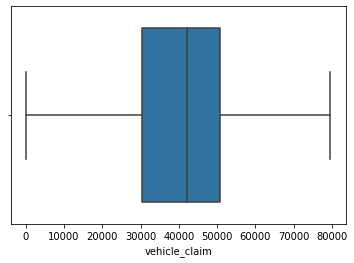

In [119]:
sns.boxplot(df1['vehicle_claim'])

Observations:

1.There are no outliers.

36:auto_make

In [120]:
df1['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

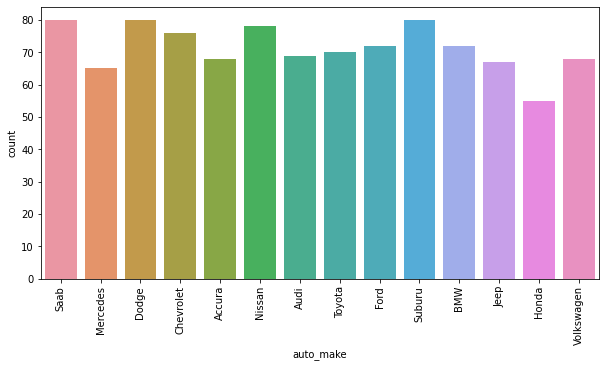

In [121]:
plt.figure(figsize=(10,5))
count181=sns.countplot(df1['auto_make'])
count181.set_xticklabels(count181.get_xticklabels(),rotation=90)
plt.show()

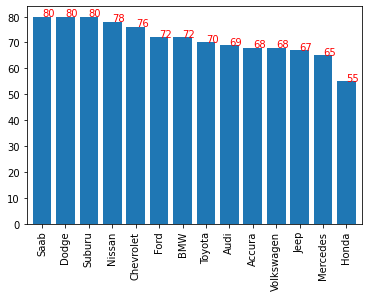

In [122]:
s = df1['auto_make'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.auto_make + 0.2 , v.auto_make, color='red')

Observations:

1.Dodge,Saab,Suburu are same in number and tops the chart,followed by Nissan and chevrolet.

In [123]:
le.fit(df1['auto_make'])
label_auto_make=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['auto_make']=le.fit_transform(df1['auto_make'])

37:auto_model

In [124]:
df1['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

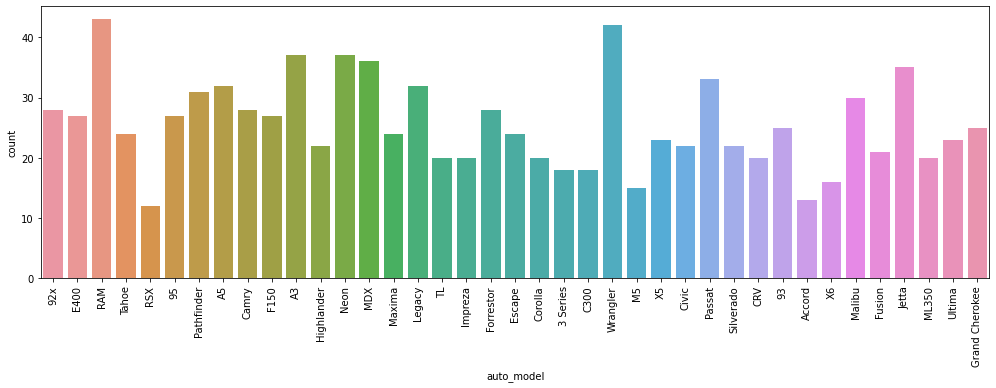

In [125]:
plt.figure(figsize=(17,5))
count185=sns.countplot(df1['auto_model'])
count185.set_xticklabels(count185.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.Wragler,RAM,Jetta,A3 are highest in numbers.

In [126]:
le.fit(df1['auto_model'])
label_auto_model=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['auto_model']=le.fit_transform(df1['auto_model'])

38:auto_year

In [127]:
df1['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

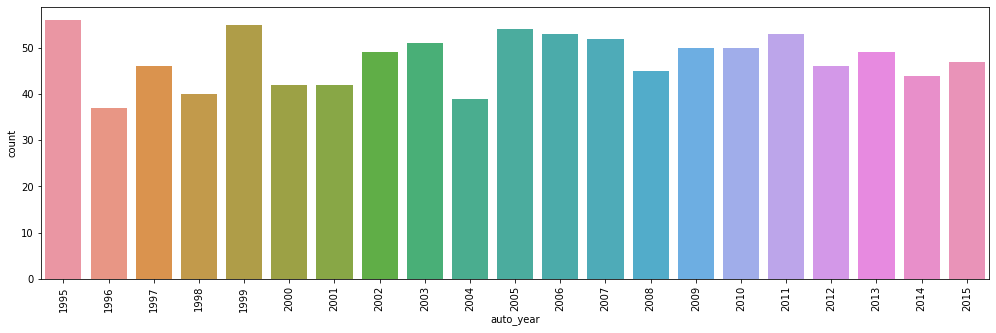

In [128]:
plt.figure(figsize=(17,5))
count190=sns.countplot(df1['auto_year'])
count190.set_xticklabels(count190.get_xticklabels(),rotation=90)
plt.show()

Observations:

1.The years 1995,1999 and 2011 tops the chart.

In [129]:
df2=df1.iloc[0:997]

In [130]:
df2['property_damage'].value_counts()

NO     525
YES    472
Name: property_damage, dtype: int64

In [131]:
df2['property_damage'].replace(['NO','YES'],[0,1],inplace=True)

In [132]:
le.fit(df2['police_report_available'])
label_police_report_available=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['police_report_available']=le.fit_transform(df2['police_report_available'])

In [133]:
le.fit(df2['auto_year'])
label_auto_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['auto_year']=le.fit_transform(df2['auto_year'])

40:fraud_reported

In [134]:
df2['fraud_reported'].value_counts()

N    750
Y    247
Name: fraud_reported, dtype: int64

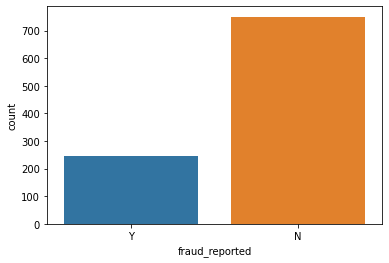

In [135]:
sns.countplot(df2['fraud_reported'])

Observations:

1.There is a clear class imbalance.

In [136]:
le.fit(df2['fraud_reported'])
label_fraud_reported=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['fraud_reported']=le.fit_transform(df2['fraud_reported'])

40:policy_bind_year

In [137]:
le.fit(df2['policy_bind_year'])
label_policy_bind_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['policy_bind_year']=le.fit_transform(df2['policy_bind_year'])

Multivariate analysis

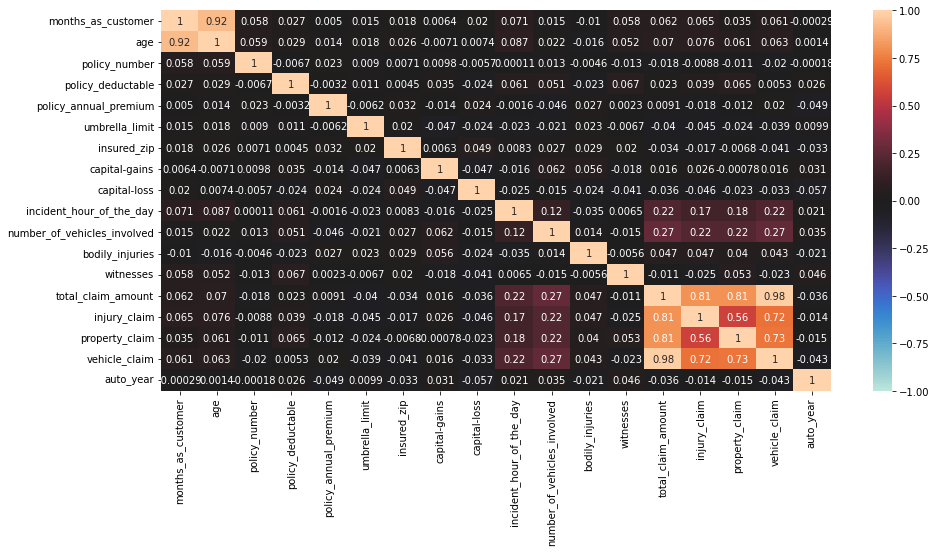

In [138]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

In [139]:
#Sorting the correlation value
corr_matrix=df2.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.169823
total_claim_amount             0.163185
property_claim                 0.137021
injury_claim                   0.090047
umbrella_limit                 0.058831
number_of_vehicles_involved    0.051641
witnesses                      0.050934
bodily_injuries                0.033283
insured_sex                    0.030484
policy_state                   0.030174
property_damage                0.023570
months_as_customer             0.022828
insured_relationship           0.021016
insured_zip                    0.019358
age                            0.014701
policy_deductable              0.007711
insured_education_level        0.007684
auto_year                      0.006577
incident_hour_of_the_day       0.002426
insured_occupation             0.001143
policy_bind_year               0.000346
auto_model                    -0.000414
capital-loss                  -0.013244
policy_annual_premium         -0.015139


Observations:

There are variables which are highly correlated with response variables ,Lets list down and analyse them in Bi variate analysis. 1.Incident seviarity 2.Total claim amount 3.injury claim 4.property claim 5.vehicle claim

Observations:

There are independent variable which are significantly correlalted to each other. 1.Number of vehicle involved vs incident type 2.total claim amount vs incident type 3.Injury claim vs incident type 4.property claim vs incident type 5.vehicle claim vs incident type 6.total claim amount vs incident seviarity 7.Injury claim vs incident severity 8.property claim vs incident severity 9.vehicle claim vs incident severity 10.vehicle claim vs incident hour of the day 11.total claim vs incident hour of the day 12.no of vehicle involved vs total claim amount 13.no of vehicle involved vs injury claimed 14.property claim vs no of vehicle involved 15.vehicle claim vs no of vehicle involved.

Multivariate analysis by grouping

In [140]:
fraud=df2.groupby('fraud_reported')
fraud_0=fraud.get_group(0)
fraud_1=fraud.get_group(1)

In [141]:
fraud_0.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0,750.000000
mean,202.018667,38.832000,0.998667,0.966667,0.961333,1258.788253,1.832000,500425.521333,0.454667,2.961333,6.653333,9.904000,2.39600,25486.933333,-26660.800000,1.204000,1.028000,1.405333,2.201333,3.309333,3.024000,11.657333,1.809333,0.466667,0.977333,1.452000,0.493333,50330.373333,7190.373333,7028.773333,36111.226667,6.609333,19.342667,10.094667,0.0,11.597333
std,113.007318,8.916077,0.832419,0.810616,0.798763,240.989355,1.852661,72090.011088,0.498273,1.946507,3.985934,5.636886,1.68532,27941.147188,28286.993513,1.097264,0.720121,0.868357,1.523557,2.172849,2.027043,6.972857,1.008465,0.499221,0.815909,1.123705,0.500289,27573.425532,4964.520784,4832.952928,19692.751897,4.042256,11.196207,5.998028,0.0,7.387464
min,0.000000,20.000000,0.000000,0.000000,0.000000,433.330000,0.000000,430104.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,114.250000,32.000000,0.000000,0.000000,0.000000,1097.657500,1.000000,446790.000000,0.000000,1.000000,3.000000,4.000000,1.00000,0.000000,-51475.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34687.500000,3485.000000,3720.000000,25270.000000,3.000000,9.250000,5.000000,0.0,5.000000
50%,199.500000,38.000000,1.000000,1.000000,1.000000,1252.800000,1.000000,465719.000000,0.000000,3.000000,7.000000,10.000000,2.00000,0.000000,-20800.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,56560.000000,6620.000000,6570.000000,41260.000000,7.000000,20.000000,10.000000,0.0,12.000000
75%,275.750000,44.000000,2.000000,2.000000,2.000000,1422.725000,1.000000,603177.000000,1.000000,5.000000,10.000000,15.000000,4.00000,51400.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,17.000000,3.000000,1.000000,2.000000,2.000000,1.000000,69592.500000,11150.000000,10660.000000,49965.000000,10.000000,29.000000,15.000000,0.0,18.000000
max,479.000000,64.000000,2.000000,2.000000,2.000000,2047.590000,10.000000,620962.000000,1.000000,6.000000,13.000000,19.000000,5.00000,100500.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.000000,1.000000,2.000000,3.000000,1.000000,114920.000000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,20.000000,0.0,25.000000


In [142]:
fraud_1.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
count,247.000000,247.000000,247.00000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0,247.000000
mean,208.080972,39.141700,1.05668,0.898785,0.975709,1250.236275,2.093117,503637.959514,0.489879,2.995951,6.663968,9.267206,2.477733,24193.522267,-27522.672065,1.076923,1.000000,0.518219,2.044534,3.048583,2.821862,11.696356,1.931174,0.493927,1.040486,1.582996,0.457490,60302.105263,8208.340081,8560.121457,43533.643725,6.352227,19.331984,10.186235,1.0,11.603239
std,119.824064,9.648295,0.82444,0.787271,0.826035,253.263651,2.092241,70487.502045,0.500913,1.947477,4.123652,5.754590,1.664585,27766.252081,27603.232184,1.031099,0.754391,0.830486,1.554576,2.086948,2.083776,6.888256,1.047315,0.500978,0.830308,1.066962,0.499201,20746.279567,4550.307780,4631.741098,14849.388907,4.012357,10.994969,6.071871,0.0,7.303835
min,3.000000,19.000000,0.00000,0.000000,0.000000,484.670000,1.000000,430141.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2860.000000,0.000000,0.000000,2080.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,116.000000,32.000000,0.00000,0.000000,0.000000,1062.615000,1.000000,452924.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51650.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,51910.000000,5370.000000,5815.000000,37170.000000,3.000000,10.000000,5.000000,1.0,5.000000
50%,199.000000,38.000000,1.00000,1.000000,1.000000,1269.640000,1.000000,469853.000000,0.000000,3.000000,6.000000,8.000000,2.000000,0.000000,-30200.000000,2.000000,1.000000,0.000000,3.000000,4.000000,3.000000,12.000000,1.000000,0.000000,1.000000,2.000000,0.000000,61290.000000,7240.000000,7440.000000,44800.000000,6.000000,20.000000,11.000000,1.0,12.000000
75%,279.000000,45.000000,2.00000,2.000000,2.000000,1396.330000,1.000000,603807.000000,1.000000,5.000000,11.000000,14.500000,4.000000,48850.000000,0.000000,2.000000,2.000000,1.000000,3.000000,5.000000,5.000000,17.000000,3.000000,1.000000,2.000000,2.000000,1.000000,72665.000000,11900.000000,11300.000000,52080.000000,10.000000,29.000000,16.000000,1.0,18.000000
max,478.000000,63.000000,2.00000,2.000000,2.000000,1935.850000,10.000000,620819.000000,1.000000,6.000000,13.000000,19.000000,5.000000,91900.000000,0.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,23.000000,4.000000,1.000000,2.000000,3.000000,1.000000,112320.000000,20700.000000,21810.000000,77760.000000,13.000000,38.000000,20.000000,1.0,24.000000


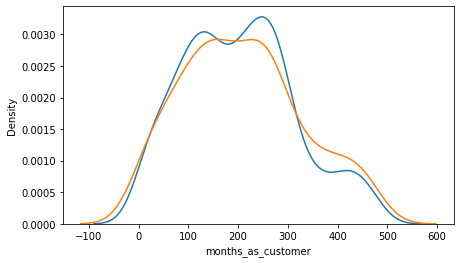

In [143]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['months_as_customer'],hist=False,rug=False)
sns.distplot(fraud_1['months_as_customer'],hist=False,rug=False)
plt.show()

Observations:

1.There is no significant information here.

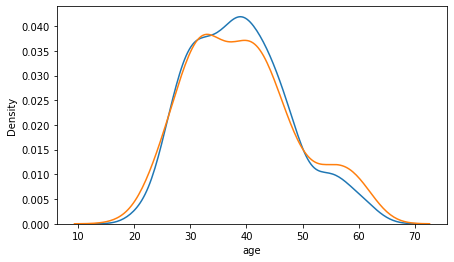

In [144]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['age'],hist=False,rug=False)
sns.distplot(fraud_1['age'],hist=False,rug=False)
plt.show()

Observations:

1.There is no significant information

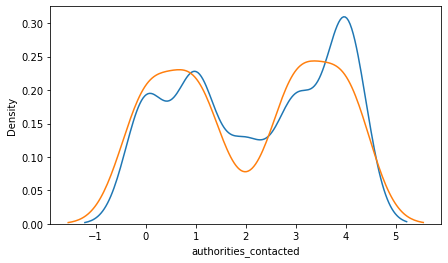

In [145]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['authorities_contacted'],hist=False,rug=False)
sns.distplot(fraud_1['authorities_contacted'],hist=False,rug=False)
plt.show()

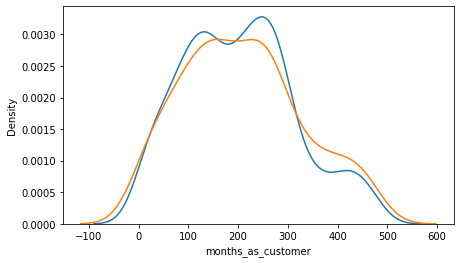

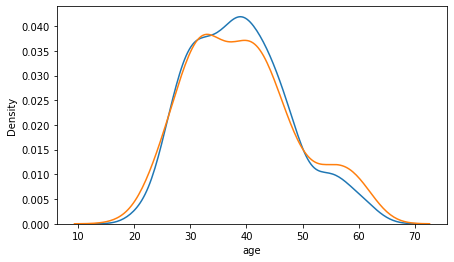

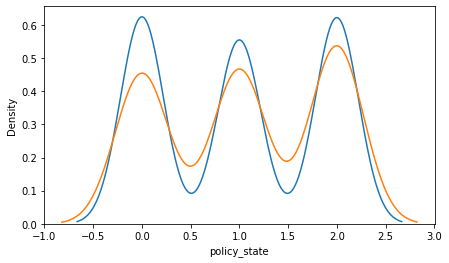

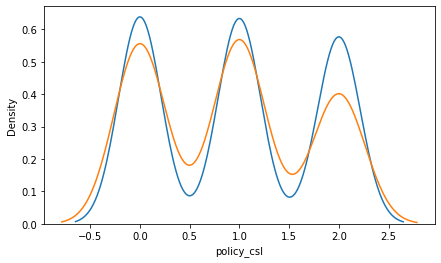

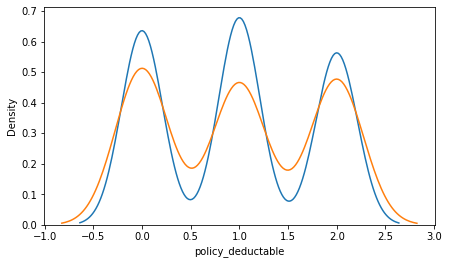

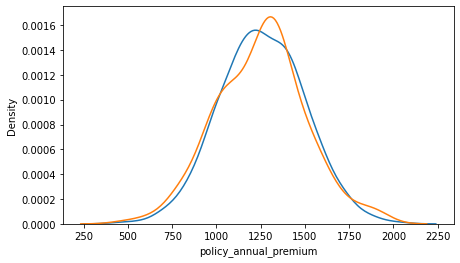

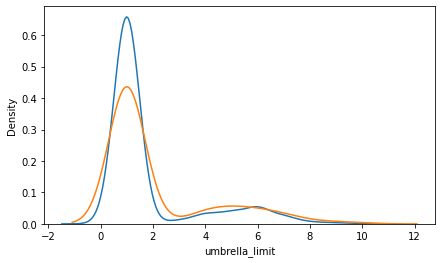

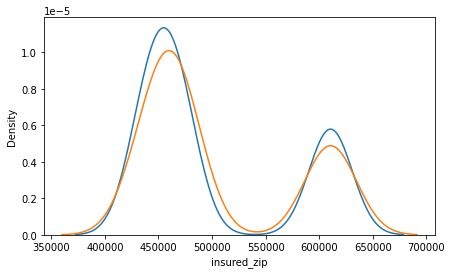

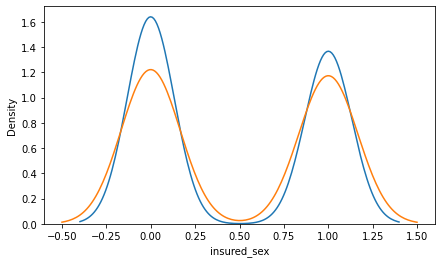

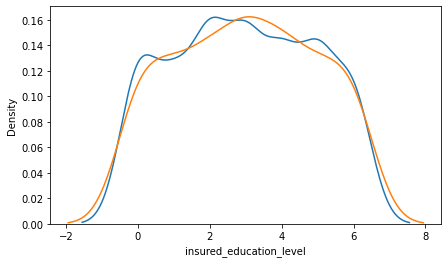

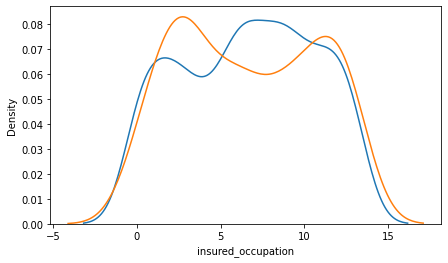

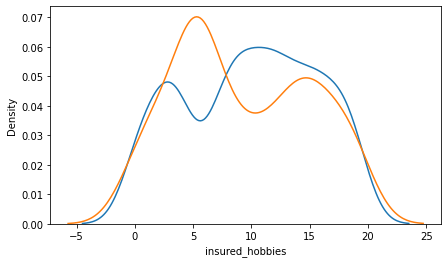

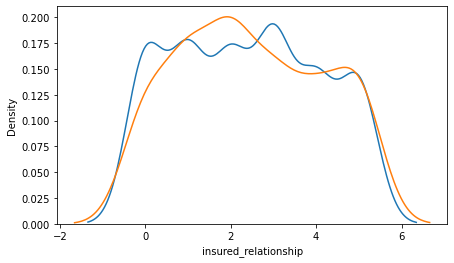

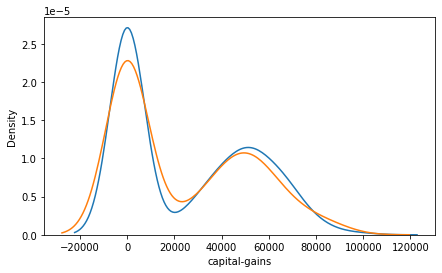

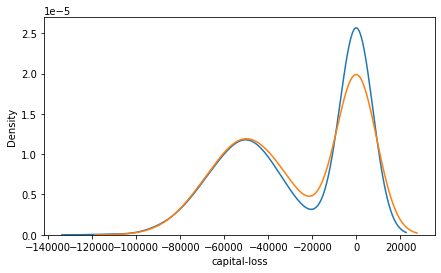

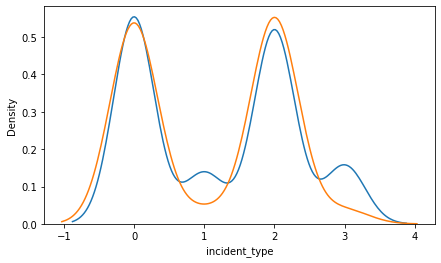

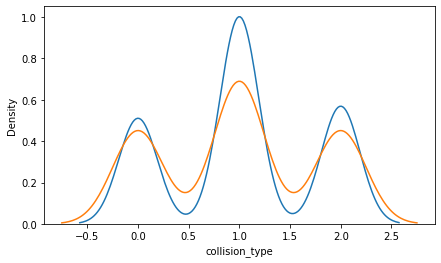

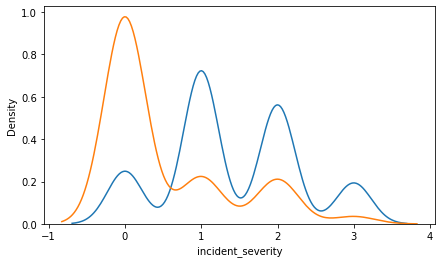

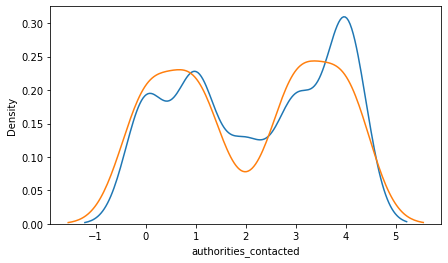

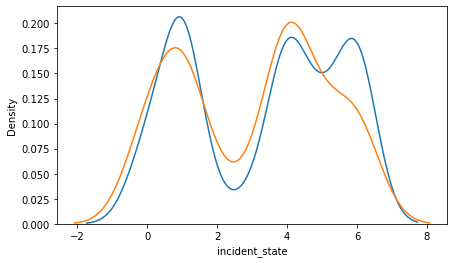

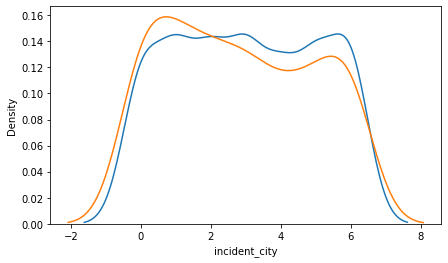

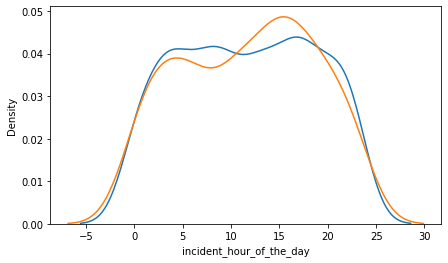

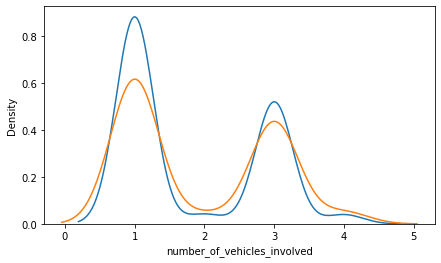

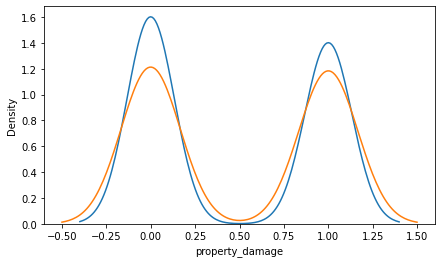

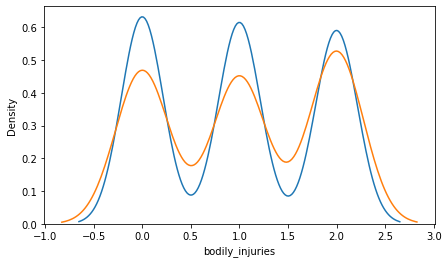

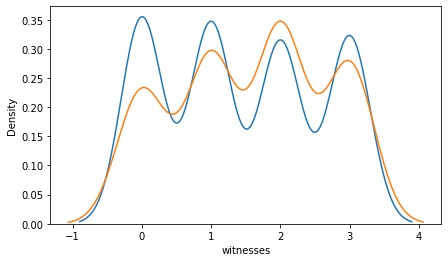

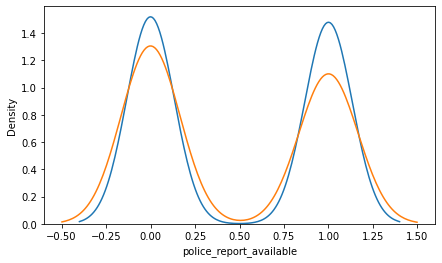

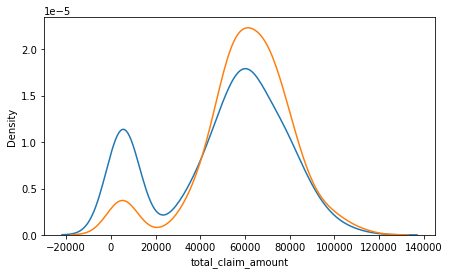

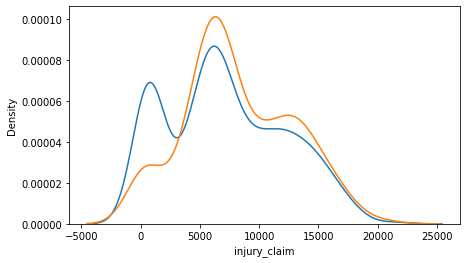

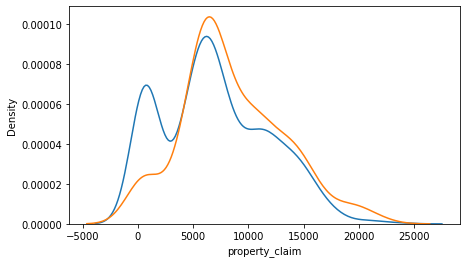

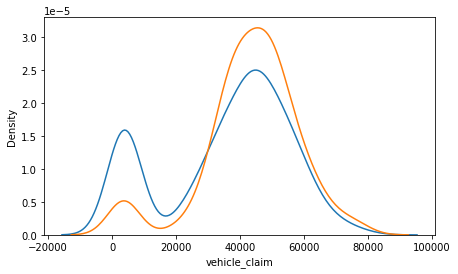

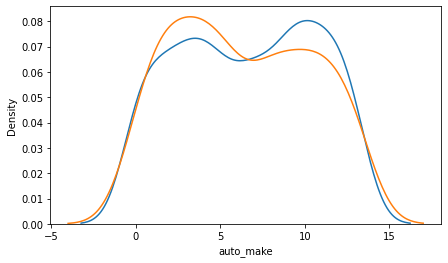

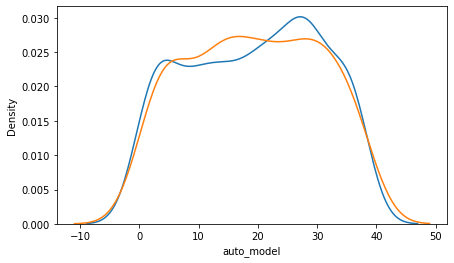

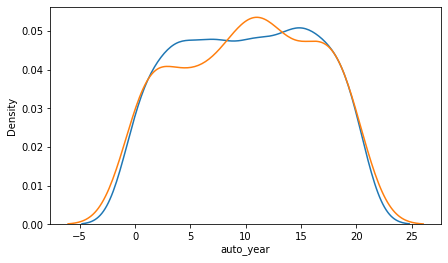

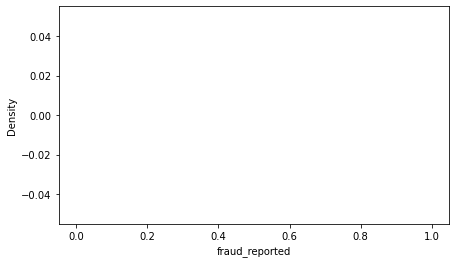

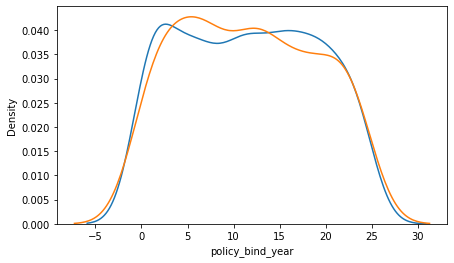

In [146]:
for i in df2.columns:
    plt.figure(figsize=(7,4))
    sns.distplot(fraud_0[i],hist=False,rug=False)
    sns.distplot(fraud_1[i],hist=False,rug=False)
    plt.show()
    print('\n')

Bi variate analysis

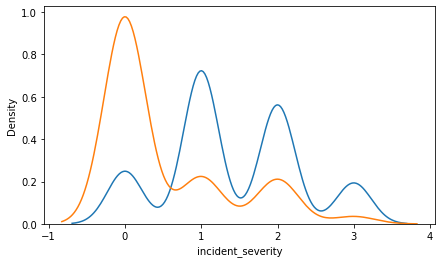

In [147]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['incident_severity'],hist=False,rug=False)
sns.distplot(fraud_1['incident_severity'],hist=False,rug=False)
plt.show()

Observations:

1.Most of the fraud happens in the major damaged severity cases.

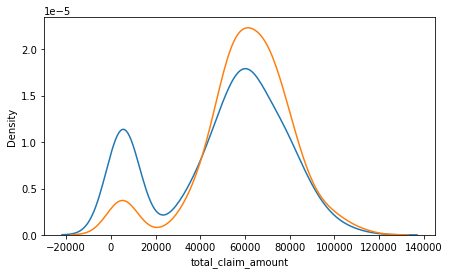

In [148]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(fraud_1['total_claim_amount'],hist=False,rug=False)
plt.show()

Observations:

1.Most of the fraud cases happens in the range of 40000 to 90000 in total claim amount.

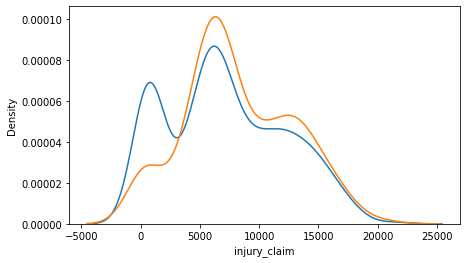

In [149]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['injury_claim'],hist=False,rug=False)
sns.distplot(fraud_1['injury_claim'],hist=False,rug=False)
plt.show()

Observations:

1.Majority of the fraud cases happens in the range of 5000 to 15000 in injury claim.

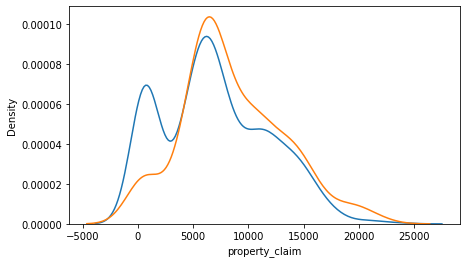

In [150]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['property_claim'],hist=False,rug=False)
sns.distplot(fraud_1['property_claim'],hist=False,rug=False)
plt.show()

Observations:

1.The property claim in the range of -2500 to 4000 will have non fraud cases.

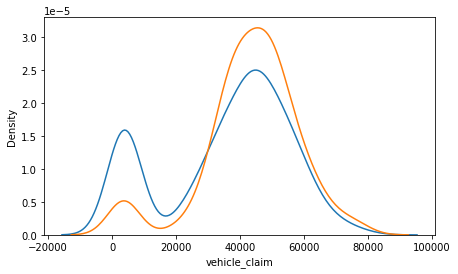

In [151]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['vehicle_claim'],hist=False,rug=False)
sns.distplot(fraud_1['vehicle_claim'],hist=False,rug=False)
plt.show()

Observations:

1.Most of the fraud cases observed in the range of 30000 to 80000 in vehicle claim.

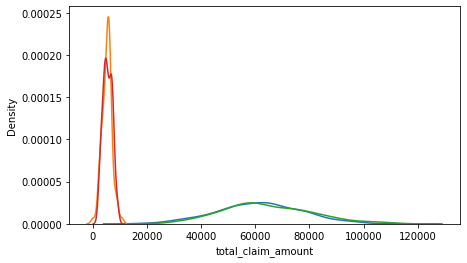

In [152]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_3['total_claim_amount'],hist=False,rug=False)
plt.show()

Observations:

1.Multivehicle collision and vehicle theft behaves in the same way along the range of total claim amount. 2.Parked car and signle vehicle collision behaves in the same way along the range of total claim amount.

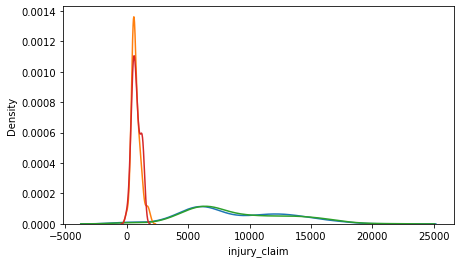

In [153]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['injury_claim'],hist=False,rug=False)
plt.show()

Observations:

1.It behaves in the same way as total amount claim.

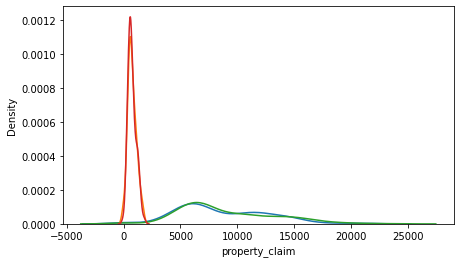

In [154]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['property_claim'],hist=False,rug=False)
plt.show()

Observations:

1.Mutivehicle collison and vehicle theft have a property claim in the range 0 to 2500, 2.Parked vehicle and single vehicle collision have property claim in the range 0 to 20000.

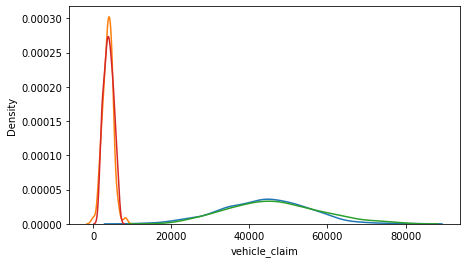

In [155]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['vehicle_claim'],hist=False,rug=False)
plt.show()

Observations:

1.It also behaves as above observations.

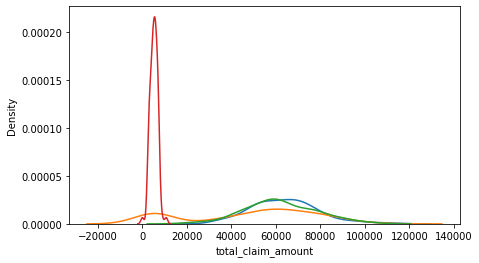

In [156]:
incident_severity=df2.groupby('incident_severity')
incident_severity_0=incident_severity.get_group(0)
incident_severity_1=incident_severity.get_group(1)
incident_severity_2=incident_severity.get_group(2)
incident_severity_3=incident_severity.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_severity_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_3['total_claim_amount'],hist=False,rug=False)
plt.show()

Observations:

1.The trival damage has total claim amount ranging from 0 to 2000. 2.Major damage,Minor damage,total loss has a total claim amount ranging from 20000 to 120000.

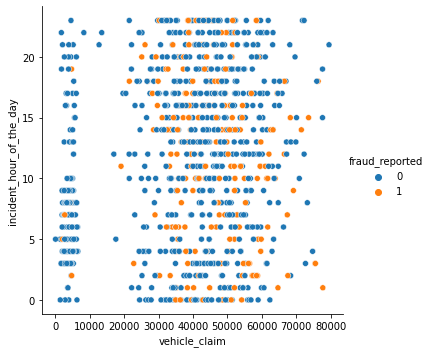

In [157]:
sns.relplot(y='incident_hour_of_the_day',x='vehicle_claim',data=df2,hue='fraud_reported')

Observations:

1.No significant informations.

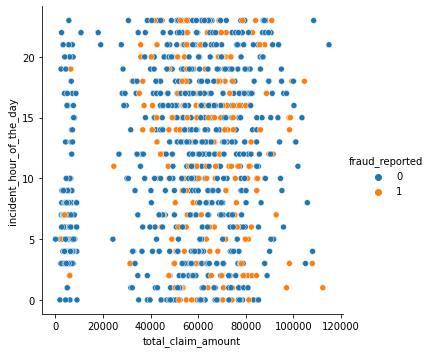

In [158]:
sns.relplot(y='incident_hour_of_the_day',x='total_claim_amount',data=df2,hue='fraud_reported')

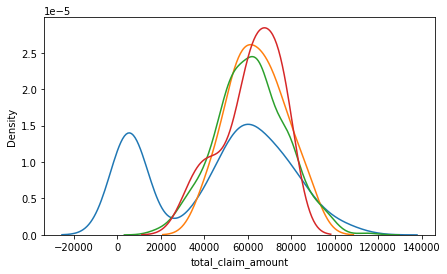

In [159]:
number_of_vehicles_involved=df2.groupby('number_of_vehicles_involved')
number_of_vehicles_involved_1=number_of_vehicles_involved.get_group(1)
number_of_vehicles_involved_2=number_of_vehicles_involved.get_group(2)
number_of_vehicles_involved_3=number_of_vehicles_involved.get_group(3)
number_of_vehicles_involved_4=number_of_vehicles_involved.get_group(4)
plt.figure(figsize=(7,4))
sns.distplot(number_of_vehicles_involved_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_3['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_4['total_claim_amount'],hist=False,rug=False)
plt.show()

Observations:

1.If number of vehicle involved is 1 then the range of total claim amount varies from -20000 to 120000. 2.If number of vehicle involved is 2,3 and 4 then the range of total claim amount varies from 20000 to 100000.

Cleaning of the data

In [160]:
df2.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [161]:
k=df2.applymap(np.isreal)

In [162]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

months_as_customer
True    997
Name: months_as_customer, dtype: int64


age
True    997
Name: age, dtype: int64


policy_state
True    997
Name: policy_state, dtype: int64


policy_csl
True    997
Name: policy_csl, dtype: int64


policy_deductable
True    997
Name: policy_deductable, dtype: int64


policy_annual_premium
True    997
Name: policy_annual_premium, dtype: int64


umbrella_limit
True    997
Name: umbrella_limit, dtype: int64


insured_zip
True    997
Name: insured_zip, dtype: int64


insured_sex
True    997
Name: insured_sex, dtype: int64


insured_education_level
True    997
Name: insured_education_level, dtype: int64


insured_occupation
True    997
Name: insured_occupation, dtype: int64


insured_hobbies
True    997
Name: insured_hobbies, dtype: int64


insured_relationship
True    997
Name: insured_relationship, dtype: int64


capital-gains
True    997
Name: capital-gains, dtype: int64


capital-loss
True    997
Name: capital-loss, dtype: int64


incident_type
True    99

Observations:

1.The data is cleaned.

Removal of outliers

zscore method

In [163]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df3=df2[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df2.shape[0]-df3.shape[0])/df2.shape[0])

percentage of loss of data by zscore is : 0.01905717151454363


Splitting the Variables

In [164]:
x=df3.drop('fraud_reported',axis=1)
y=df3['fraud_reported']

Removal of skewness

In [165]:
x.skew()

months_as_customer             0.358407
age                            0.468369
policy_state                  -0.036285
policy_csl                     0.100336
policy_deductable              0.057425
policy_annual_premium          0.040128
umbrella_limit                 1.904091
insured_zip                    0.839253
insured_sex                    0.139611
insured_education_level        0.006148
insured_occupation            -0.058133
insured_hobbies               -0.061824
insured_relationship           0.075541
capital-gains                  0.463520
capital-loss                  -0.385387
incident_type                  0.091942
collision_type                -0.031286
incident_severity              0.275720
authorities_contacted         -0.107329
incident_state                -0.149344
incident_city                  0.038224
incident_hour_of_the_day      -0.043797
number_of_vehicles_involved    0.506349
property_damage                0.098429
bodily_injuries                0.000000


Observations:

1.Since most of the columns are of categorical type so the skewness is within the range.

Using Over sampling and smote techniques for class imbalance problem

In [166]:
sudo pip install imbalanced-learn

SyntaxError: ignored

In [167]:
from sklearn.base import clone

In [169]:
from sklearn.utils._testing import assert_allclose
from sklearn.utils._testing import assert_array_equal
from sklearn.neighbors import NearestNeighbors

from imblearn.over_sampling import SMOTE

In [170]:
SM=SMOTE()

x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_resample(x,y)

Accuracy score through over sampling

In [171]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.27,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.529
classification report is
              precision    recall  f1-score   support

           0       0.58      0.45      0.51       214
           1       0.49      0.62      0.55       185

    accuracy                           0.53       399
   macro avg       0.54      0.54      0.53       399
weighted avg       0.54      0.53      0.53       399

confusion matrix is
[[ 96 118]
 [ 70 115]]




Accuracy score through smote techniques

In [172]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.27,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.586
classification report is
              precision    recall  f1-score   support

           0       0.66      0.48      0.56       214
           1       0.54      0.71      0.61       185

    accuracy                           0.59       399
   macro avg       0.60      0.59      0.58       399
weighted avg       0.60      0.59      0.58       399

confusion matrix is
[[103 111]
 [ 54 131]]




Observations:

1.We can see that out of three set of models (x,y),(x_over,y_over),(x_smote,y_smote), eventhough the x,y model has highest accuracy but it has f1 score of 1 as 0,so the best inputs are x_smote,y_smote

Checking accuracy through standard scaling

In [173]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x_smote)

In [174]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.797
classification report is
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       214
           1       0.75      0.85      0.80       185

    accuracy                           0.80       399
   macro avg       0.80      0.80      0.80       399
weighted avg       0.80      0.80      0.80       399

confusion matrix is
[[160  54]
 [ 27 158]]




1.Through standard scaling there is very significant increase in accuracy as well as f1 score

Building the model

In [175]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [176]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8446115288220551 on random state 86


In [177]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=86)

In [178]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.845
classification report is
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       204
           1       0.83      0.86      0.84       195

    accuracy                           0.84       399
   macro avg       0.84      0.84      0.84       399
weighted avg       0.85      0.84      0.84       399

confusion matrix is
[[170  34]
 [ 28 167]]




In [179]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.807
classification report is
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       204
           1       0.77      0.87      0.81       195

    accuracy                           0.81       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.81      0.81      0.81       399

confusion matrix is
[[153  51]
 [ 26 169]]




In [180]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.892
classification report is
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       204
           1       0.90      0.87      0.89       195

    accuracy                           0.89       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.89      0.89      0.89       399

confusion matrix is
[[186  18]
 [ 25 170]]




In [181]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.82
classification report is
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       204
           1       0.81      0.83      0.82       195

    accuracy                           0.82       399
   macro avg       0.82      0.82      0.82       399
weighted avg       0.82      0.82      0.82       399

confusion matrix is
[[165  39]
 [ 33 162]]




In [182]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.714
classification report is
              precision    recall  f1-score   support

           0       0.98      0.45      0.62       204
           1       0.63      0.99      0.77       195

    accuracy                           0.71       399
   macro avg       0.81      0.72      0.69       399
weighted avg       0.81      0.71      0.69       399

confusion matrix is
[[ 92 112]
 [  2 193]]




In [183]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.865
classification report is
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       204
           1       0.86      0.86      0.86       195

    accuracy                           0.86       399
   macro avg       0.86      0.86      0.86       399
weighted avg       0.86      0.86      0.86       399

confusion matrix is
[[177  27]
 [ 27 168]]




In [184]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.875
classification report is
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       204
           1       0.88      0.86      0.87       195

    accuracy                           0.87       399
   macro avg       0.88      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399

confusion matrix is
[[182  22]
 [ 28 167]]




Cross validation scores

In [185]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,xs,y_smote,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.787


GaussianNB() score is:
0.754


SVC() score is:
0.831


DecisionTreeClassifier() score is:
0.823


KNeighborsClassifier() score is:
0.702


AdaBoostClassifier() score is:
0.835


RandomForestClassifier() score is:
0.861




**Finding the best model**

# **The difference between accuracy score and cross val score are:**
Model difference f1scores 1.lg 0.06 0.85/0.85 2.gnb 0.056 0.8/0.82 3.svc 0.063 0.9/0.89 4.dtc 0.004 0.78/0.79 5.knn 0.005 0.6/0.76 6.add 0.06 0.88/0.88 7.rf 0.045 0.9/0.91

Since its an class imbalance type problem not only difference but f1 score also plays a major role, so Random Forest Classifier is the best model

Hyper parameter tuning

In [186]:
grid_param={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'class_weight':['balanced_subsample','balanced']
    
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(xs,y_smote)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100, 'oob_score': False}
0.874761795693999


In [187]:
rf1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features='sqrt',bootstrap=False,oob_score=False,class_weight='balanced_subsample')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.88
classification report is
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       204
           1       0.90      0.85      0.87       195

    accuracy                           0.88       399
   macro avg       0.88      0.88      0.88       399
weighted avg       0.88      0.88      0.88       399

confusion matrix is
[[185  19]
 [ 29 166]]




Observations:

The maximum accuracy we got through least overfitting and with highest f1 score is 0.902

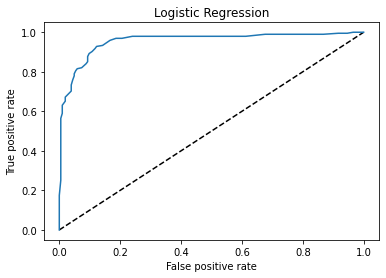

0.8790723981900452

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:

1.The auc_roc score for this particular model is 0.843, suggesting that model is going to perform better.

Saving the model

In [189]:
import joblib
joblib.dump(rf1,'Insuranceclaim.obj')

['Insuranceclaim.obj']